In [1]:
%%html

<style>    
    @import url("css/custom_styles.css")
</style>

# Dataset
[Plant Village](https://data.mendeley.com/datasets/tywbtsjrjv/1)

## Description

In this data-set, 39 different classes of plant leaf and background images are available. The data-set containing 61,486 images. We used six different augmentation techniques for increasing the data-set size. The techniques are image flipping, Gamma correction, noise injection, PCA color augmentation, rotation, and Scaling.

The classes are: 

<br>

<div class="columns_2">
    
1. Apple_scab
2. Apple_black_rot
3. Apple_cedar_apple_rust
4. Apple_healthy
5. Background_without_leaves
6. Blueberry_healthy
7. Cherry_powdery_mildew
8. Cherry_healthy
9. Corn_gray_leaf_spot
10. Corn_common_rust
11. Corn_northern_leaf_blight
12. Corn_healthy
13. Grape_black_rot
14. Grape_black_measles
15. Grape_leaf_blight
16. Grape_healthy
17. Orange_haunglongbing
18. Peach_bacterial_spot
19. Peach_healthy
20. Pepper_bacterial_spot

</div>

<div class="columns_2">
    
21. Pepper_healthy
22. Potato_early_blight
23. Potato_healthy
24. Potato_late_blight
25. Raspberry_healthy
26. Soybean_healthy
27. Squash_powdery_mildew
28. Strawberry_healthy
29. Strawberry_leaf_scorch
30. Tomato_bacterial_spot
31. Tomato_early_blight
32. Tomato_healthy
33. Tomato_late_blight
34. Tomato_leaf_mold
35. Tomato_septoria_leaf_spot
36. Tomato_spider_mites_two-spotted_spider_mite
37. Tomato_target_spot
38. Tomato_mosaic_virus
39. Tomato_yellow_leaf_curl_virus
    
</div>

In [2]:
%matplotlib inline

#
# import utilitaires
#
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import helpers as hlp
import helpers.dataset.PlantVillage as pv
import helpers.features as feat

from helpers.jupyter import display_html

In [3]:
#
# parametres dataset PlantVillage
#
config_overrides = hlp.MetaObject.from_json("config_overrides.json")
executor = hlp.create_thread_pool_executor()

pv_config = pv.Config(executor)
if not config_overrides is None:
    hlp.MetaObject.override_from_object(pv_config, 
                                        config_overrides.dataset)

print("pv_config")
display(vars(pv_config))


#
# obtenir le dataset PlantVillage
#
with hlp.Profile() as load_profile:
    pv_dataset = pv.load(pv_config)
    pv_dataframe = pv_dataset.dataframe
    
print(f"Loading dataset:", load_profile.round_duration(), "s")

pv_config


{'url': 'https://tinyurl.com/22tas3na',
 'install_path': 'dataset/PlantVillage.hd5',
 'species_disease_re': '(.*)(?:___)(.*)',
 'species_re': '(.*)(?:,_|_)(.*)',
 'label_separator': '_',
 'train_install_path': '',
 'test_install_path': '',
 'force_download': False,
 'force_install': False,
 'read_only': True,
 'executor': <concurrent.futures.thread.ThreadPoolExecutor at 0x1d6e9b7f370>,
 'thumbnail_scale': 0.25}

Preprocesssing dataset\Plant_leaf_diseases_dataset_with_augmentation.zip


  0%|          | 0/61526 [00:00<?, ?it/s]

Loading dataset: 5.89 s


# Exploration

In [4]:
display_html(f"<b>{pv_config.install_path}</b> - data {pv_dataframe.shape}")
display(pv_dataframe.head(5))

,species,disease,label,image_path
0,Orange,Haunglongbing_(Citrus_greening),Orange_Haunglongbing_(Citrus_greening),Plant_leave_diseases_dataset_with_augmentation...
1,Tomato,Spider_mites Two-spotted_spider_mite,Tomato_Spider_mites Two-spotted_spider_mite,Plant_leave_diseases_dataset_with_augmentation...
2,"Pepper,_bell",Bacterial_spot,"Pepper,_bell_Bacterial_spot",Plant_leave_diseases_dataset_with_augmentation...
3,Orange,Haunglongbing_(Citrus_greening),Orange_Haunglongbing_(Citrus_greening),Plant_leave_diseases_dataset_with_augmentation...
4,Orange,Haunglongbing_(Citrus_greening),Orange_Haunglongbing_(Citrus_greening),Plant_leave_diseases_dataset_with_augmentation...


In [5]:
display_html(f"<b>{pv_config.install_path}</b> - info")
pv_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60343 entries, 0 to 60342
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   species     60343 non-null  object
 1   disease     60343 non-null  object
 2   label       60343 non-null  object
 3   image_path  60343 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
species = pv_dataframe["species"].unique()
species.sort()
display_html(f"<b>Modalites de 'species'</b> - count: {species.size}")
display(list(species))

['Apple',
 'Blueberry',
 'Cherry',
 'Corn',
 'Grape',
 'Orange',
 'Peach',
 'Pepper,_bell',
 'Potato',
 'Raspberry',
 'Soybean',
 'Squash',
 'Strawberry',
 'Tomato']

In [7]:
labels = pv_dataframe["label"].unique()
labels.sort()
display_html(f"<b>Modalites de 'label'</b> - count: {len(labels)}")
display(list(labels))

['Apple_Black_rot',
 'Apple_Cedar_apple_rust',
 'Apple_healthy',
 'Apple_scab',
 'Blueberry_healthy',
 'Cherry_Powdery_mildew',
 'Cherry_healthy',
 'Corn_Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_Common_rust',
 'Corn_Northern_Leaf_Blight',
 'Corn_healthy',
 'Grape_Black_rot',
 'Grape_Esca_(Black_Measles)',
 'Grape_Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape_healthy',
 'Orange_Haunglongbing_(Citrus_greening)',
 'Peach_Bacterial_spot',
 'Peach_healthy',
 'Pepper,_bell_Bacterial_spot',
 'Pepper,_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Raspberry_healthy',
 'Soybean_healthy',
 'Squash_Powdery_mildew',
 'Strawberry_Leaf_scorch',
 'Strawberry_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites Two-spotted_spider_mite',
 'Tomato_Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_healthy',
 'Tomato_mosaic_virus']

<font class="answer">

**Notes**
* Background_without_leaves a été intentionelment enlevé
* Les labels semblent avoir evolués par rapport à la liste cite ci-haut

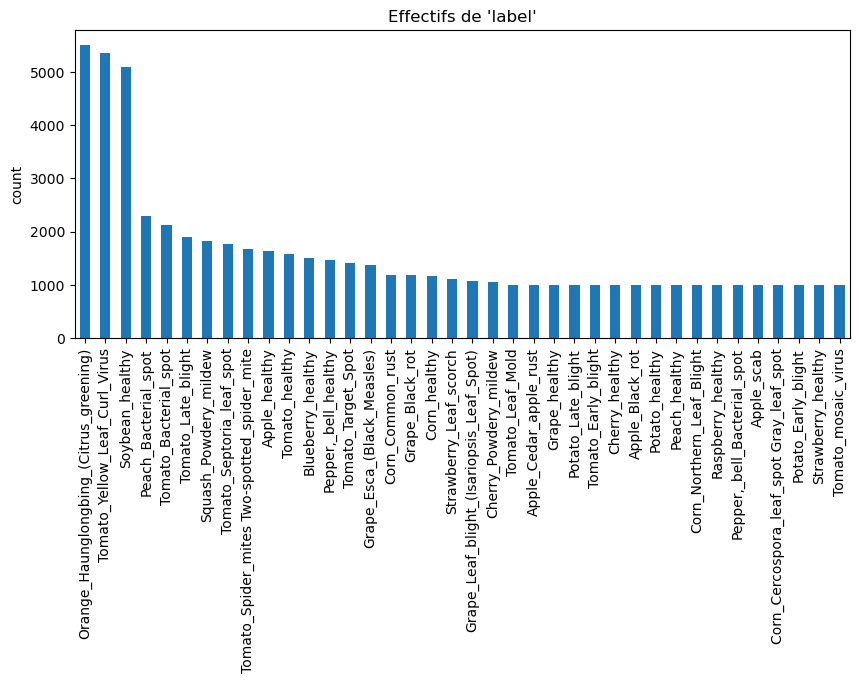

In [8]:
#
# distribution de label
#
FIGSIZE = (10, 4)

disease_count = pv_dataframe["label"].value_counts()
disease_count.sort_values(inplace=True, ascending=False)

plt.figure(figsize=FIGSIZE)
disease_count.plot.bar(title="Effectifs de 'label'",
                       ylabel="count")
plt.show()

In [9]:
#
# relation species/label
#
doi = pv_dataframe[["label", "species"]]

disease_samples_per_species = doi.groupby("species").count()
disease_samples_per_species.sort_values("label", inplace=True, ascending=False)

In [10]:
healthy_crit = doi["label"].str.contains("healthy")

healthy = doi[healthy_crit]
healthy = healthy \
            .groupby("species") \
            .count() \
            .rename(columns={"label": "healthy"})

not_healthy = doi[ ~healthy_crit ]
not_healthy = not_healthy \
                .groupby("species") \
                .count() \
                .rename(columns={"label": "autres"})

healthy_vs_other_per_species = pd.merge(healthy, 
                                        not_healthy,
                                        how="outer",
                                        on="species")

# pour faciliter la comparison, garder le meme ordre que disease_samples_per_species
healthy_vs_other_per_species = healthy_vs_other_per_species \
                                   .reindex(disease_samples_per_species \
                                   .index.to_list())

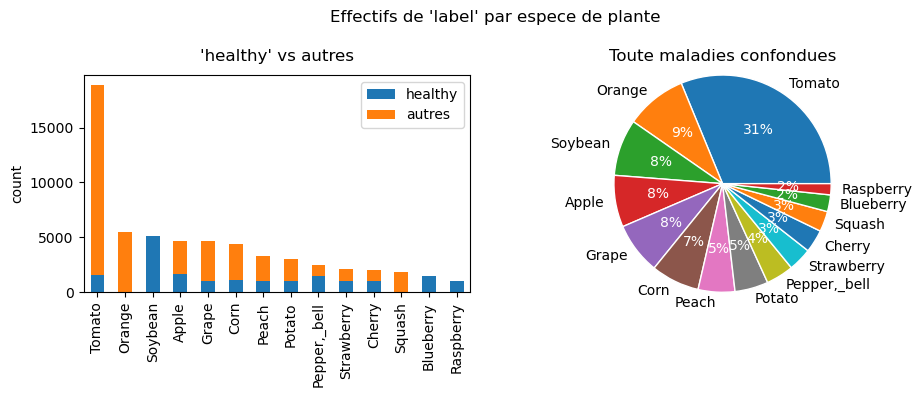

In [11]:
fig = plt.figure(figsize=FIGSIZE)
fig.suptitle("Effectifs de 'label' par espece de plante")

plt.subplot(121)
healthy_vs_other_per_species.plot.bar(ax=plt.gca(),
                                      stacked=True, 
                                      xlabel="",
                                      ylabel="count")
plt.title("'healthy' vs autres", y=1.025)

plt.subplot(122)
_, _, pcts = plt.pie(x=disease_samples_per_species.values.flatten(),
                     labels=disease_samples_per_species.index.values,
                     autopct='%.0f%%',
                     radius=1.25,
                     wedgeprops={'linewidth': 1.0, 
                                 'edgecolor': 'white'})
plt.title("Toute maladies confondues", y=1.025)
plt.setp(pcts, color='white')

plt.tight_layout()
plt.show()

In [12]:
#
# visualiser quelques images
#
SAMPLES_GRID = (2, 7)

# selectionner quelques images aleatoirement (mais pas trop aleatoire)
random.seed(42)
sample_indices = random.sample(range(pv_dataframe.shape[0]), 
                               SAMPLES_GRID[0] * SAMPLES_GRID[1])
sample_indices.sort()

samples = pv_dataframe.iloc[sample_indices]

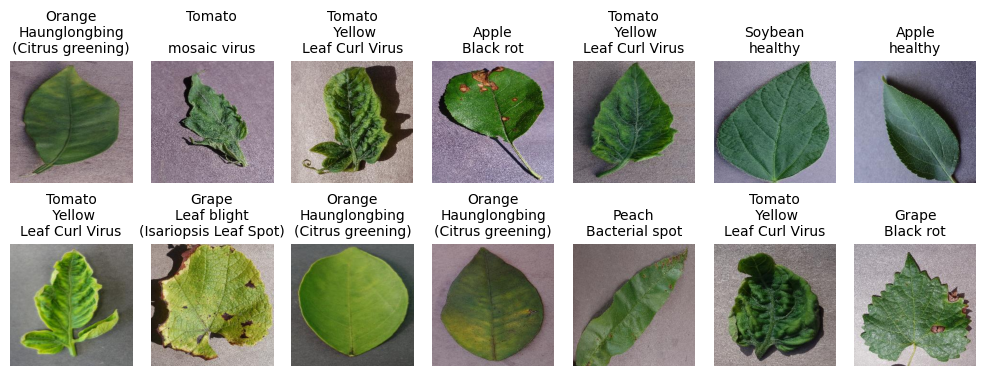

In [13]:
# FIGSIZE = (10, 6.5)

fig = plt.figure(figsize=FIGSIZE)

for i, (sample_index, sample_data) in enumerate(samples.iterrows()):
    plt.subplot(SAMPLES_GRID[0], SAMPLES_GRID[1], i + 1)
    plt.axis("off")

    species = sample_data['species']
    disease = pv.attribute_prettify(species, sample_data['disease'])
        
    image = pv_dataset.get_image(sample_index)
    
    plt.title(f"{species}\n{disease}")    
    plt.imshow(image)
    plt.gca().title.set_size(10)

plt.tight_layout()
fig.subplots_adjust(hspace=0.5, top=0.8)
plt.show()